<a href="https://colab.research.google.com/github/Kendi798/Brainstroke-prediction-using-Neural-Network/blob/main/Brain_Stroke_Prediction_Using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BRAIN STROKE PREDICTION**

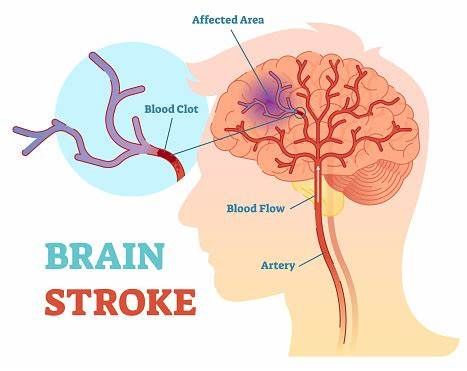

# **PROBLEM STATEMENT**

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths, and third leading cause of disability.

Brain Stroke happens when there is a blockage in the blood circulation in the brain or when a blood vessel in the brain breaks and leaks. The burst or blockage prevents blood and oxygen reaching the brain tissue leading to the death of brain cells. This sometimes results in physical, cognitive and mental disabilities.

80% of strokes are preventable. Our project aims at evaluating the factors that may increase the chances of someone getting a stroke and building a model that can accurately predict these chances. This will help many people know the risk factors of getting a stroke and how to prevent or avoid such risks and in return, many lives will be saved.


# **1. Defining the Question**

### **Specifying the Question**

> What is the likelihood of a patient getting a stroke?

### **Defining the Metric for Success**

> This research will be considered solvent when we are able to predict the likelihood of a patient getting a stroke with a model with a precision score of 90% and above.

### **Understanding the context**

> A stroke is a medical condition in which poor blood flow to the brain causes cell death. There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both cause parts of the brain to stop functioning properly.

> Signs and symptoms of a stroke may include an inability to move or feel on one side of the body, problems understanding or speaking, dizziness, or loss of vision to one side. Signs and symptoms often appear soon after the stroke has occurred. If symptoms last less than one or two hours, the stroke is a transient ischemic attack (TIA), also called a mini-stroke. A hemorrhagic stroke may also be associated with a severe headache. The symptoms of a stroke can be permanent. Long-term complications may include pneumonia and loss of bladder control.

> The main risk factor for stroke is high blood pressure. Other risk factors include high blood cholesterol, tobacco smoking, obesity, diabetes mellitus, a previous TIA, end-stage kidney disease, and atrial fibrillation.




### **Research Objectives**

#### **Main Objective**

To predict the likelihood of a patient getting a stroke.

#### **Specific Objectives**

1. To find the relationship between age, BMI, glucose level and getting a stroke
2. To find out if hypertension and heart disease influences the likelyhood of getting a stroke
3. To establish whether patient's who've ever married are more likely to get a stroke than those who have never married
4. To identify the correlation between a patient's smoking status, place of residence and type of occupation and stroke


### **Recording the Experimental Design**

* Defining the research question
* Load data and preview preliminary characteristics of the dataset
* Finding and dealing with outliers, anomalies, and missing data within the dataset
* Perform exploratory data analysis
* Implement the solution
* Challenge the solution


### **Relevance of the data**

> This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

# **2. Reading and checking the data**

In [1]:
#Importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset csv
stroke = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
stroke

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/healthcare-dataset-stroke-data.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Displaying the top of our dataset
stroke.head()

In [ ]:
# Displaying the bottom of our dataset
stroke.tail()

In [ ]:
# Checking the shape of the dataset
stroke.shape

**Observations**
> The dataset has 5110 rows and 12 columns.

In [ ]:
# Checking the info of our dataset
stroke.info()

**Observations**
> From the output, the dataset has some null values on the bmi column. All other columns do not have any null values and each column has the appropriate datatype.

In [ ]:
# Checking the columns
list(stroke)

### **Explaining the Columns**
id: unique identifier

gender: "Male", "Female" or "Other"

age: age of the patient

hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

ever_married: "No" or "Yes"

work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

Residence_type: "Rural" or "Urban"

avg_glucose_level: average glucose level in blood

bmi: body mass index

smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*. "Unknown" means that the information is unavailable for this patient

stroke: 1 if the patient had a stroke or 0 if not

# **3. External Data Source Validation**

> This was extracted from Kaggle open source.

# **4. Data Cleaning**

### Checking for duplicates

In [ ]:
# Checking if we have duplicates in the dataset
stroke.duplicated().any()

**Observations**
> There are no any duplicated values in the dataset.

### Checking missing values

In [ ]:
# Checking the total number of missing values
print(stroke.isnull().sum())

**Observations**
> Our dataset has a total of 201 missing values in the bmi column.

### Removing missing values

In [ ]:
# We will drop the missing values from our dataset and assign the new dataset the variable stroke1

stroke1 = stroke.dropna()
stroke1

**Observations**
> The new dataframe has 4909 rows and 12 columns

In [ ]:
# Checking if there are any missing values in the new dataframe
stroke1.isnull().sum()

**Observations**
> All the missing values have been dropped.

### Checking for Outliers

In [ ]:
# We will check for outliers in the numerical variables in our dataset
# age, avg_glucose_level and bmi
#
fig, ax = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=stroke1, y = 'age', ax=ax[0])
ax[0].set_title('Boxplot of Patient age')
sns.boxplot(data=stroke1, y = 'avg_glucose_level', ax=ax[1], color = 'green')
ax[1].set_title('Box Plot of Patient average glucose level')
sns.boxplot(data=stroke1, y = 'bmi', ax=ax[2], color = 'yellow')
ax[2].set_title('Box Plot of Patient Body Mass Index')
plt.show()

**Observations**
> The output of the boxplots show that there are outliers. We will go ahead and check how many records of outliers we have and decide whether to remove them or use the data as is.

In [ ]:
# We could also calculate the IQR for our 3 variables of interest
# Calculating the interquatile ranges for the 3 variables in order to check for anomalies
# IQR for age
q1_age = stroke1['age'].quantile(0.25)
q3_age = stroke1['age'].quantile(0.75)

iqr_age = q3_age - q1_age
print(iqr_age)

# IQR for patient's average glucose level
q1_agl = stroke1['avg_glucose_level'].quantile(0.25)
q3_agl = stroke1['avg_glucose_level'].quantile(0.75)

iqr_agl = q3_agl - q1_agl
print(iqr_agl)

# IQR for patient's bmi
q1_bmi = stroke1['bmi'].quantile(0.25)
q3_bmi = stroke1['bmi'].quantile(0.75)

iqr_bmi = q3_bmi - q1_bmi
print(iqr_bmi)

**Observations**
> The output shows that there are 35, 36.5 and 9.6 records that are outside the interquatile ranges in the variables, age, average glucose level and bmi respectively. This data is useful in our reasearch and will therefore not be removed.

### Checking distinctive values

In [ ]:
# Looking for unique values
stroke1.nunique()

### Dropping unnecessary columns

In [ ]:
# We will drop the id column since it is not relevant to our research
stroke1.drop('id', axis = 1, inplace = True)
stroke1.head()

# **5. Exploratory Data Analysis**

## Univariate Analysis




In [ ]:
# Checking the descriptive statistics of our dataset
stroke1.describe()

**Observations**

> The output of this summary shows the total number of rows, the mean value, the standard deviation of the data, the min and max values of the data, the 25th, 50th and 75th percentile of the data per each column with numerical values.

In [ ]:
# Checking the unique values in our categorical variables
stroke_cat = stroke1[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type',
                 'smoking_status', 'stroke']]

for i in stroke_cat.columns:
    print(stroke_cat[i].unique())

**Observations**
> All the unique categories for the categorical data are displayed.

In [ ]:
# Displaying the total number for each value of the categorical variable
for i in stroke_cat:
  print(stroke_cat[i].value_counts())

**Observations**
> The output shows the total number of values for each categorical variable

In [ ]:
# Checking the distribution of patients age and BMI using histogram
#
fig,ax=plt.subplots(1,2,figsize=(20,10))
stroke1['age'].plot.hist(ax=ax[0],bins=10,edgecolor='black',color='blue')
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age of Patient')
x1=list(range(0,95,10))
ax[0].set_xticks(x1)
stroke1['bmi'].plot.hist(ax=ax[1],color='green',bins=10,edgecolor='black')
ax[1].set_title('Distribution of BMI')
ax[1].set_xlabel('BMI of Patient')
x2=list(range(0,75,10))
ax[1].set_xticks(x2)
plt.show()

**Observations**
> The output of the two histograms show that the distribution of the patient's age and BMI are symmetrical. This means that the data has a normal ditribution.

In [ ]:
# Checking the distribution of patients average glucose level using a density plot
#
sns.set(rc={'figure.figsize':(8,8)})
s = sns.kdeplot(stroke1['avg_glucose_level'],shade=True)
s.set_title('Distribution of Average Glucose Level')

**Observations**
> The output shows that the distribution of the patient's average glucose level is not symmetrical. The distribution is skewed toward the right.

In [ ]:
# Using bar charts to show the distribution of the patients with hypertension
# and those with heart disease
#
fig,ax=plt.subplots(1,2,figsize=(20,10))
stroke1['hypertension'].value_counts().plot.bar(rot=0, ax=ax[0])
ax[0].set_title('Patients with hypertension')
ax[0].set_xlabel('Hypertension')
stroke1['heart_disease'].value_counts().plot.bar(rot=0, ax=ax[1], color='yellow')
ax[1].set_title('Patients with heart disease')
ax[1].set_xlabel('Heart Disease')
plt.show()

**Observation**
>The number of patients with hypertention is higher than those without and the number of patients with heart disease is higher than those without as well.

In [ ]:
# Pie chart showing the percentage number of patients per gender

fig = plt.figure(figsize=(25,10))

colors = ['green', 'orange', 'black']
stroke1['gender'].value_counts().plot.pie(colors=colors, autopct='%1.1f%%', shadow=False)
plt.title('Gender of Patient')

**Observation**
>The number of female patients is higher than that of male patients.

In [ ]:
# A bar graph for checking if a patient has ever been married
#
stroke1['ever_married'].value_counts().plot.bar(rot=45, figsize=(12,7), color='maroon')
plt.title('Patient Marital Status')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.show

**Observation**
>The number of patients who have ever been married is higher than those who have never been married

In [ ]:
# Pie chart showing the percentage number of patients per work type

fig = plt.figure(figsize=(25,10))

colors = ['red', 'orange', 'pink', 'yellow', 'navy']
stroke1['work_type'].value_counts().plot.pie(colors=colors, autopct='%1.1f%%', shadow=False)
plt.title('Patients per work type')

**Observations**
> The output shows that the highest number of surveyed patients are in the private sector and the least number of surveyed patients are those who have never worked.

In [ ]:
# Checking a bar chart distribution for Smoking status of patients

stroke1['smoking_status'].value_counts().plot.bar(rot =45,figsize=(15,7), color= 'green')
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.title("Smoking Status of the Patient ")
plt.show()

**Observations**

> The number of patients who have never smoked is higher than that of patients who are former smokers and those who are smokers.



In [ ]:
# Bar chart for patients who have had stroke before

stroke1['stroke'].value_counts().plot.bar(figsize=(12,7))
plt.xlabel("Stroke")
plt.ylabel("Count")
plt.title("Patients who have heard Stroke")
plt.xticks(rotation = 60)
plt.show()

**Observations**
> The number of patients who have not had stroke before is higher than those who have suffered from stroke.

## Bivariate Analysis

In [ ]:
# We will start by previewing our dataset
stroke1.head()

In [ ]:
sns.pairplot(stroke1)
plt.show()

**Observations**
> The pairplot shows the correlation between different variables.

In [ ]:
# Comparing the marital status of patients to their work type
fig = plt.figure(figsize=(14,7))
sns.countplot(x = 'work_type', hue='ever_married',data=stroke1)
plt.xticks(rotation=60)

**Observations**
> The output shows that the number of patients who have ever been married is higher than those who have never been married across all job sectors with the highest number being in the private sector.

In [ ]:
# Checking which gender is most Likely to have hypertension
stroke1.groupby('gender')['hypertension'].value_counts().unstack(level=0).plot(kind='bar', stacked='True', figsize=(15,8))
labels = stroke1.groupby('gender')['hypertension'].value_counts(normalize=True)
print(labels)
plt.xticks(rotation = 45)
plt.xlabel("hypertension")
plt.ylabel("Frequency")
plt.title(" Gender Vs having hypertension")
plt.show()

**Observations**
> The output shows that the number of patients with hypertension is smaller than that of the patients without hypertension. It also shows that the male patients with hypertension are fewer than female patients with hypertension.

In [ ]:
# Checking which gender is was highly affected by stroke before
stroke1.groupby('gender')['stroke'].value_counts().unstack(level=0).plot(kind='bar', stacked='True', figsize=(15,8))
labels = stroke1.groupby('gender')['stroke'].value_counts(normalize=False)
print(labels)
plt.xticks(rotation = 45)
plt.xlabel("Stroke")
plt.ylabel("Frequency")
plt.title(" Gender Vs having a Stroke")
plt.show()

**Observations**
> The output shows that the number of patients without stroke is higher than that of the patients with stroke. It also shows that the number of female patients with stroke is higher than that of male patients.

In [ ]:
# Checking which gender is most Likely to smoke
stroke1.groupby('gender')['smoking_status'].value_counts().unstack(level=0).plot(kind='bar', stacked='True', figsize=(15,8))
labels = stroke1.groupby('gender')['smoking_status'].value_counts(normalize=True)
print(labels)
plt.xticks(rotation = 45)
plt.xlabel("smoking_status")
plt.ylabel("Frequency")
plt.title(" Gender Vs Smoking Status")
plt.show()

**Observations**
> The number of female patients who have never smoked is higher than that of male patients. Female patients who smoke are also more than their male counterparts.

In [ ]:
# Checking which gender has the highest number of patients who have ever been married
stroke1.groupby('gender')['ever_married'].value_counts().unstack(level=0).plot(kind='bar', stacked='True', figsize=(15,8))
labels = stroke1.groupby('gender')['ever_married'].value_counts(normalize=True)
print(labels)
plt.xticks(rotation = 45)
plt.xlabel("ever_married")
plt.ylabel("Frequency")
plt.title(" Gender Vs Married Status")
plt.show()

In [ ]:
# Checking if the heart disease influences the chances of one getting a stroke

fig,ax=plt.subplots(1,2,figsize=(16,8))

sns.countplot(x = 'hypertension', hue='stroke',data=stroke1,ax=ax[0])
ax[0].set_title('Hypertension vs stroke')

sns.countplot(x = 'heart_disease',hue='stroke',data=stroke1,ax=ax[1])
ax[1].set_title('Heart Disease vs Stroke')

for ax in fig.axes:
  plt.sca(ax)
  plt.xticks(rotation=60)

plt.show()

In [ ]:
# Checking which residence type has the highest number of stroke patients
Residence = stroke1.groupby(stroke1['Residence_type'])['stroke'].sum()
colors = ['green', 'skyblue']
Residence.plot(kind='pie', autopct='%1.1f%%', title='Residence area of people who had stroke', figsize=(20,10), colors = colors)

**Observation**
> The output shows the patients with stroke were more in the urban areas than in the rural residence.

In [ ]:
# Ploting a bar graph to show age distribution per each gender
#
fig = plt.figure(figsize=(15,7))
w = sns.barplot(data= stroke1, x = 'gender', y = 'age', color='yellow')
w.set_title('Distribution of age against gender')
plt.show()

**Observation**
> The output shows the average age of female patients is higher than that of male patients and others.

In [ ]:
#Relationship between residence, work type and stroke

pd.crosstab([stroke1.Residence_type, stroke1.stroke]
            ,stroke1.work_type, margins=True).style.background_gradient(cmap='Pastel1_r')


**Observations**

> From the output, more women have had stroke compared to men. We also see that people working in the private sector have a high change to get a stroke.

In [ ]:
# How does marital status and smoking status affect stroke?

pd.crosstab([stroke1.ever_married,stroke1.stroke]
            ,stroke1.smoking_status,margins=True).style.background_gradient(cmap='Pastel1_r')


**Observations**

> From the output, people who have ever been married had stroke more than those who have never been married. We also see that people who have never smoked for both the ever married and those who have never been married had higher chances of stroke.

In [ ]:
# Distribution of the ages of stroke patients across the different genders
stroke_age = stroke1.loc[stroke1['stroke']== 1].reset_index()
stroke_age["male_age"]=stroke_age[stroke_age["gender"]=="Male"]["age"]
stroke_age["female_age"]=stroke_age[stroke_age["gender"]=="Female"]["age"]
stroke_age[["male_age","female_age"]].plot(kind="hist", bins=20, figsize=(15,7), title="Stroke Ages")
plt.xlabel('Ages')
plt.ylabel('Count')

**Observation**
> The number of female patients with stroke is higher than that of male patients. The distribution also shows that chances of getting a stroke increases with age.

In [ ]:
#Checking for correlation between our variables
stroke1.corr()

In [ ]:
# Heat map
plt.figure(figsize=(15,7))
sns.heatmap(stroke1.corr(), annot= True,)

**Observations**

From the observation, there is no any high correlation between stroke and other variables.

There is a small positive correlation between stroke and Age, Hypertension, Heart Disease, Average Glucose Level.

Small positive correlation between Age and Stroke, Hypertension, Heart Disease, Average Glucose Level, BMI.

Small positive correlation between Smoking Status and Marital Status, Occupation Type and BMI.

Medium positive correlation between Age and Occupation Type.

Medium negative correlation between Age and Marital Status.

# **6. Implementing the Solution**

### **Encoding**

In [ ]:
# Converting categorical values to numerical
# importing LabelEncoder for categorical variables with binary values
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
categorical_cols = ['gender', 'ever_married', 'Residence_type']
stroke1[categorical_cols] = stroke1[categorical_cols].apply(lambda col: le.fit_transform(col))
stroke1.head(5)

**Observations**

The data has been transformed into numerical as follows:

gender:
> 1 = Male, 0 = Female

ever married:
> 1 = Yes, 0 = No

Residence type:
> 1 = Urban, 0 = Rural

In [ ]:
# Encoding categorical data with more than 2 values using get_dummies
stroke2 = pd.get_dummies(stroke1, columns=['work_type','smoking_status'], drop_first=False)
stroke2.head()

**Observations**
> Our dataset has received additional dummy variables. This is because the 'work_type' and 'smoking_status' variables have been split into different variables each representing a specific category.

In [ ]:
# Previewing the shape of our encoded dataset
stroke2.shape

**Observations**
> After encoding, our dataset now has 4909 rows and 18 columns.

### **Splitting the data**

In [ ]:
# Splitting the dataset into train and test using train test split
# We will use a test size of 25%
#
from sklearn.model_selection import train_test_split

X=stroke2.drop('stroke',axis=1)
y=stroke2['stroke']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=0)

In [ ]:
# Checking the shapes of our feature variables
X.shape, X_train.shape, X_test.shape

**Observations**
> Our feature variables have 4909 rows and 17 columns, X_train has 3681 rows and 17 columns and X_test has 1228 rows and 17 columns.

In [ ]:
# Checking the shapes of our target variable
y.shape, y_train.shape, y_test.shape

**Observations**
> Our target variables have 4909 rows y_train has 3681 rows  and y_test has 1228 rows.

In [ ]:
# Checking the target variable to see if the classes are balanced
#
y_train.value_counts()

**Observations**

> The output shows that 3521 patients do not have stroke while only 160 of them have stroke. This means that our target variable is imbalanced.

In [ ]:
stroke2['stroke'].value_counts()

### **Normalization of data**

In [ ]:
# We will normalize our data by using StandardScaler
# Initialize the scaler
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fitting the scaler
scaler.fit(X_train)

# Applying the transformation to the data
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

### **Training our Model**

In [ ]:
# we will train our model using Neural Network's Tensorflow library
import tensorflow as tf
tf.random.set_seed(0)

# We will use the sequential model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(80, activation = 'relu'),
    tf.keras.layers.Dense(60, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
                             ])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
    ])

# Modeling
# We will now fit the X_train and y_train into our algorithm
# and save our mode under the variable history
#
history = model.fit(X_train, y_train, epochs = 10)

In [ ]:
# We then visualize the metrics to see how the model is performing
#
plt.figure(figsize=(16, 8))
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['precision'], label = 'Precision')
plt.plot(history.history['recall'], label = 'Recall')
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()

**Observations**
> From the output, we note that the loss function decreases, the accuracy increases slightly then remains almost constant, the precision keeps fluctuating with a few spikes and the recall increases then decreases slightly as the model continues to train.

### **Prediction and Evaluation**

In [ ]:
# Using our model to make predictions
#
pred = model.predict(X_test)

# extract the predicted class labels
pred = np.where(pred > 0.5, 1, 0)

In [ ]:
# Evaluating the model
#
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix = confusion_matrix(y_test, pred)
print(confusion_matrix)

# Looking at the classification report
print(classification_report(y_test, pred))

**Observations**
> The results from the confusion matrix tell us that 1179 and 1 are the number of correct predictions while 48 and 0 are the number of incorrect predictions. The model performance has a precision score of 96% and 100%, recall of 100% and 0.2%, and f1-score of 98% and 0.4% on patients without stroke and patients with stroke respectively.

# **7. Challenging the solution**

We will now challenge our solution by trying to remove the class inbalance from our target variable and using a different optimizer on our model. We will also use another algorithm to see if the model's accurancy and precision scores will be better.

In [ ]:
# Before training the model, we will firts start by removing the class imbalance
# import SMOTE oversampling
from collections import Counter
from imblearn.over_sampling import SMOTE

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

**Observations**

> After applying SMOTE oversampling, the classes have balanced with 3521 records each.

In [ ]:
# Now that we have removed the imbalance, we will train our model using the
# stochastic gradient descent Optimizer.
#
import tensorflow as tf
tf.random.set_seed(0)

# We will use the sequential model

model_new = tf.keras.Sequential([
    tf.keras.layers.Dense(80, activation = 'relu'),
    tf.keras.layers.Dense(60, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
                             ])

model_new.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
    ])

new = model_new.fit(X_train_SMOTE, y_train_SMOTE, epochs = 10)

**Observations**
> The loss function decreases as the training increases, accuracy, precision and recall increases as the model continuous to train.

In [ ]:
# We then visualize the metrics to see how the model is performing
#
plt.figure(figsize=(16, 8))
plt.plot(new.history['loss'], label = 'Loss')
plt.plot(new.history['accuracy'], label = 'Accuracy')
plt.plot(new.history['precision'], label = 'Precision')
plt.plot(new.history['recall'], label = 'Recall')
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()

**Observations**
> From the output, we note that the loss function decreases while the accuracy, recall and Precision increase as the model training increases.

In [ ]:
# Using our model to make predictions
#
pred = model_new.predict(X_test)

# extract the predicted class labels
pred_new = np.where(pred > 0.5, 1, 0)

In [ ]:
# Evaluating the model
#
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix = confusion_matrix(y_test, pred_new)
print(confusion_matrix)

# Looking at the classification report
print(classification_report(y_test, pred_new))

**Observations**
> The results from the confusion matrix tell us that 889 and 27 are the number of correct predictions while 22 and 290 are the number of incorrect predictions. The model performance has a precision score of 98% and 0.9%, recall of 75% and 55%, and f1-score of 85% and 15% on patients without stroke and patients with stroke respectively. The precision score on stroke patients has decreased while the recall has increased compared to results before handling the class imbalance and using Adam optimizer.

In [ ]:
# We will now use Support Vector Machine algorithm to predict and
# evaluate the performance of the model
# import SVM libraries
#
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

model=SVC()
clf = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_svc = clf.predict(X_test)

confusion_matrix = confusion_matrix(y_test, pred_svc)
print(confusion_matrix)
print(classification_report(y_test, pred_svc))

**Observations**
> The output tells us that 989 and 19 are the number of correct predictions while 30 and 190 are the number of incorrect predictions. The model has a precision score of 97% and 0.9%, recall of 84% and 39%, and f1-score of 90% and 15% on patients without stroke and patients with stroke respectively.  The precision score and recall have decreased compared to performance using Neural Network Tensorflow with SGD as the optimizer.

# **8. Follow up questions**

### a). Did we have the right data?

The given data was relevant in answering our research question as we were able to effectively investigate the given variables and gain insights on the characteristics of stroke patients in the given population.

### b). Do we need other data to answer our question?
In order to properly understand and predict the chances of one getting a stroke, we could also investigate the characteristics of more variables of stroke patients such as other health conditions associated with stroke patients, lifestyle of stroke patients and health care accessibility.

### c). Did we have the right question?
Our question was right because it enabled us have correct objectives that enabled us create a model that would predict the chances of a patient getting a stroke.

# **9. Recommendations**

1. We patients living with hypertension and heart disease to get better medical care so as to reduce the chances of getting a stroke.

2. Individuals who smoke should stop smoking as they risk the chances of getting a stroke.

3. As people age, they should get checked regularly to minimize the chances of getting a stroke because the chances of getting a stroke increases with age.

4. People leaving in urban areas and working in the private sector should immediately seek medical advise as soon as they start getting symptoms of a stroke as they stand a higher chance of getting a stroke.

# **10. Conclusion**

Although investigating the characteristics of more variables of stroke patients such as health and lifestyle conditions associated with stroke patients would have brought more perspective to our reasearch, the given data was still sufficient in answering our research question and meet the set objectives. This is because we were able to effectively investigate the given variables and build a model using Neural Network Tensorflow, that would correctly predict the chances of a patient getting a stroke with an accuracy of 96% and a precision of 100%.